<a href="https://colab.research.google.com/github/Aliii19/comparaison-algorithmes-optimisation/blob/main/Scripts_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def extract_content(file):
  contents = []
  content = []
  max_lines = []
  begin = True
  with open(file, 'r') as file:
    for line in file:
      if not line.startswith("%"):
        content.append(line.strip())
      else:
        if begin:
          begin = False
          continue
        max_lines.append(int(content[-1].split()[0]))
        contents.append(content)
        content = []
  return min(max_lines), contents

def display_mean_std(min_max, contents, is_log_xlabel, is_log_ylabel, title_graph, title_x, title_y, label_title):
  plt.title(title_graph)
  plt.grid(True)

  XY = defaultdict(list)
  for cont in contents:
    for line in cont:
      words = line.split()
      XY[int(words[0])].append(1.0 + float(words[2]))

  x = []
  y_mean = []
  y_std = []

  for key in XY.keys():
    if key <= min_max:
      x.append(key)
      y_mean.append(np.mean(XY[key]))
      y_std.append(np.std(XY[key]))

  if is_log_xlabel:
    plt.xlabel("log(" + title_x + ")")
    x = np.log(x)
  else:
    plt.xlabel(title_x)

  if is_log_ylabel:
    plt.ylabel("log(" + title_y + ")")
    y_mean = np.log(y_mean)
  else:
    plt.ylabel(title_y)

  plt.plot(x, y_mean, linestyle='-')
  plt.fill_between(x, np.array(y_mean) - np.array(y_std), np.array(y_mean) + np.array(y_std), alpha=0.2, label=label_title)
  #plt.title("Moyenne et dispersion par groupe")
  plt.legend()


def display(contents, is_log_xlabel, is_log_ylabel, title_graph, title_x, title_y):
  plt.title(title_graph)
  plt.grid(True)

  for cont in contents:
    x = []
    y = []
    for line in cont:
      words = line.split()
      x.append(int(words[0]))
      y.append(1.0 + float(words[2]))

    if is_log_xlabel:
      plt.xlabel("log(" + title_x + ")")
      x = np.log(x)
    else:
      plt.xlabel(title_x)

    if is_log_ylabel:
      plt.ylabel("log(" + title_y + ")")
      y = np.log(y)
    else:
      plt.ylabel(title_y)

    plt.plot(x, y, linestyle='-')


def display_aggr(min_max, contents, is_log_xlabel, is_log_ylabel, aggr_func, title_graph, title_x, title_y):
  plt.title(title_graph)
  plt.grid(True)

  XY = defaultdict(list)
  for cont in contents:
    for line in cont:
      words = line.split()
      XY[int(words[0])].append(1.0 + float(words[2]))

  x = []
  y = []

  for key in XY.keys():
    if key <= min_max:
      x.append(key)
      y.append(aggr_func(XY[key]))

  if is_log_xlabel:
    plt.xlabel("log(" + title_x + ")")
    x = np.log(x)
  else:
    plt.xlabel(title_x)

  if is_log_ylabel:
    plt.ylabel("log(" + title_y + ")")
    y = np.log(y)
  else:
    plt.ylabel(title_y)

  plt.plot(x, y, linestyle='-')


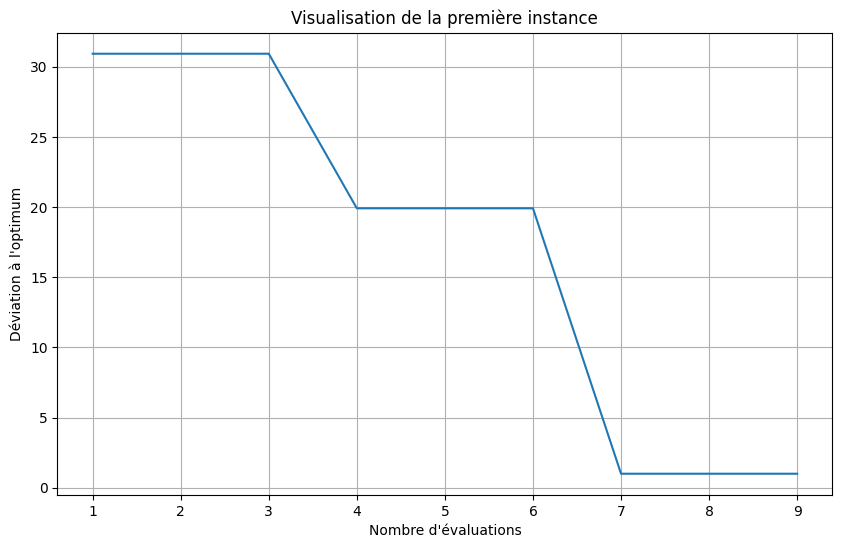

In [ ]:
contents = []
content = []
with open('sample_data/BFGS/data_f1/bbobexp_f1_DIM2.tdat', 'r') as file:
  i = 0
  for line in file:
    if not line.startswith("%"):
      content.append(line.strip())
    else:
      i += 1
      if i == 2:
        break

contents.append(content)
plt.figure(figsize=(10, 6))
display(contents, False, False, "Visualisation de la première instance", "Nombre d'évaluations", "Déviation à l'optimum")
plt.show()



In [ ]:
min_max, contents = extract_content('sample_data/BFGS/data_f1/bbobexp_f1_DIM2.tdat')

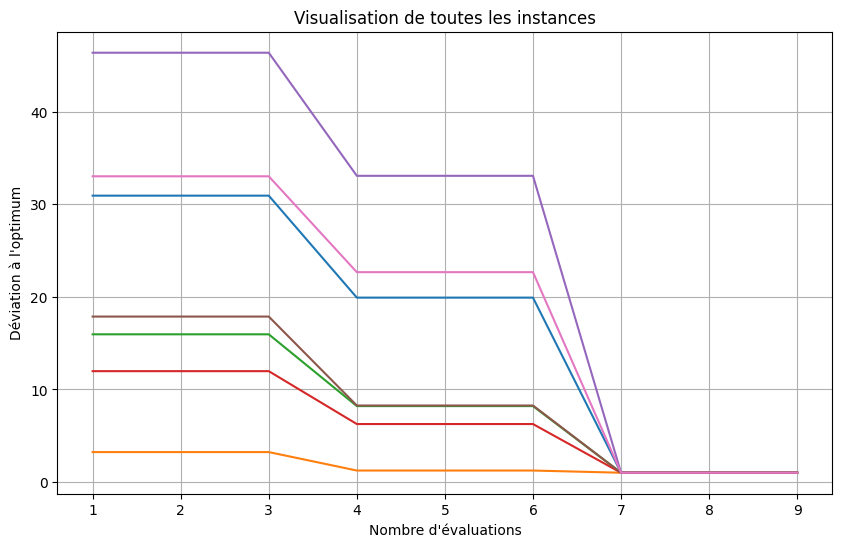

In [ ]:
plt.figure(figsize=(10, 6))
display(contents, False, False, "Visualisation de toutes les instances", "Nombre d'évaluations", "Déviation à l'optimum")
plt.show()


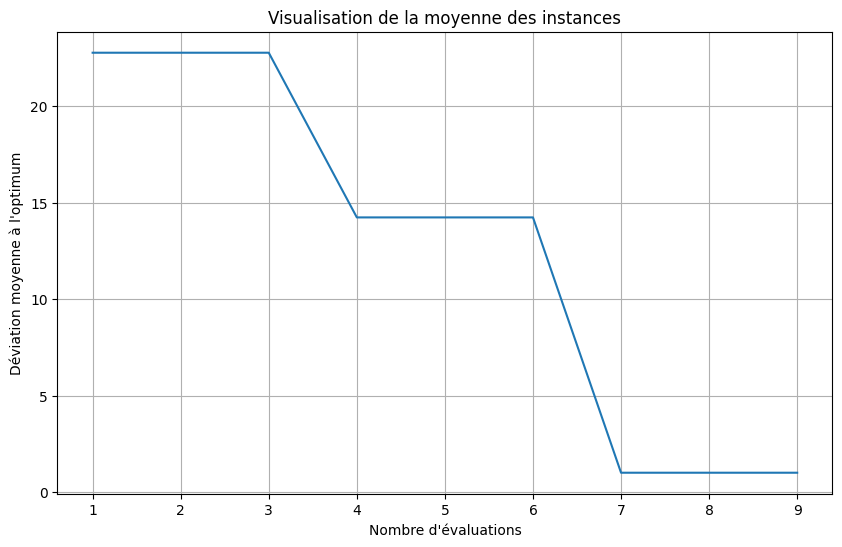

In [ ]:
plt.figure(figsize=(10, 6))
display_aggr(min_max, contents, False, False, np.mean, "Visualisation de la moyenne des instances", "Nombre d'évaluations", "Déviation moyenne à l'optimum")
plt.show()


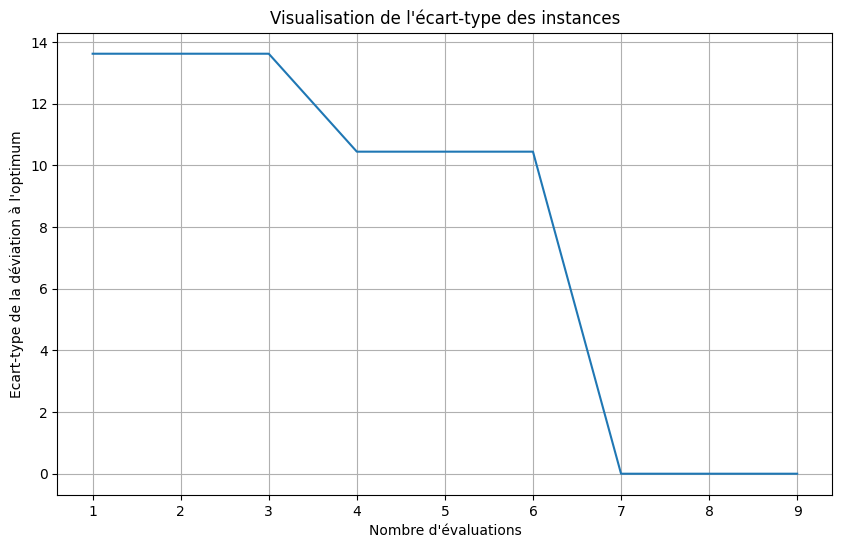

In [ ]:
plt.figure(figsize=(10, 6))
display_aggr(min_max, contents, False, False, np.std, "Visualisation de l'écart-type des instances", "Nombre d'évaluations", "Ecart-type de la déviation à l'optimum")
plt.show()


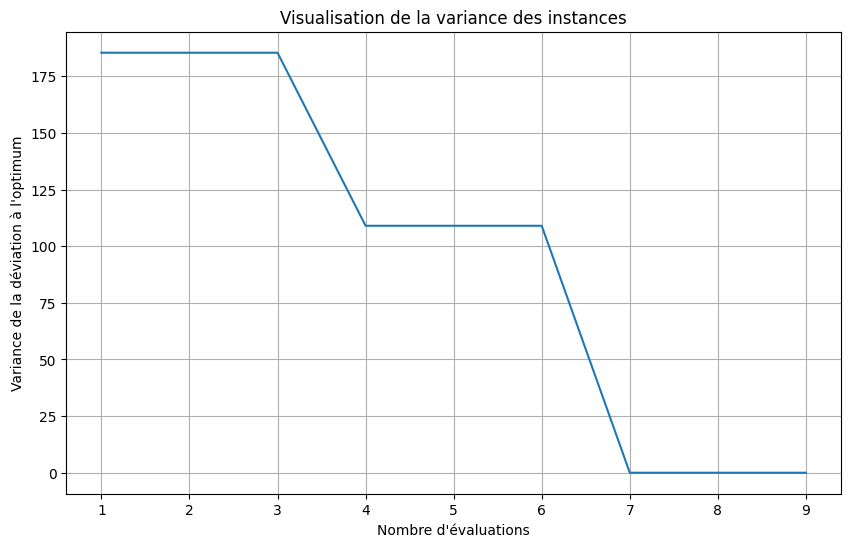

In [ ]:
plt.figure(figsize=(10, 6))
display_aggr(min_max, contents, False, False, np.var, "Visualisation de la variance des instances", "Nombre d'évaluations", "Variance de la déviation à l'optimum")
plt.show()


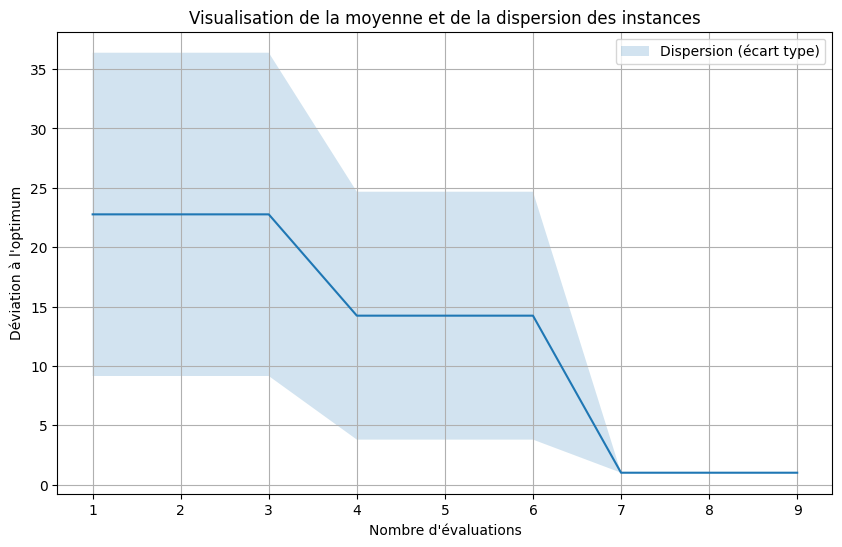

In [ ]:
plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents, False, False, "Visualisation de la moyenne et de la dispersion des instances", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion (écart type)")
plt.show()


In [ ]:
min_max1, contents1 = extract_content('sample_data/BFGS/data_f1/bbobexp_f1_DIM2.tdat')
min_max2, contents2 = extract_content('sample_data/BFGS/data_f1/bbobexp_f1_DIM10.tdat')
min_max3, contents3 = extract_content('sample_data/BFGS/data_f1/bbobexp_f1_DIM20.tdat')

min_max = min(min_max1, min_max2, min_max3)


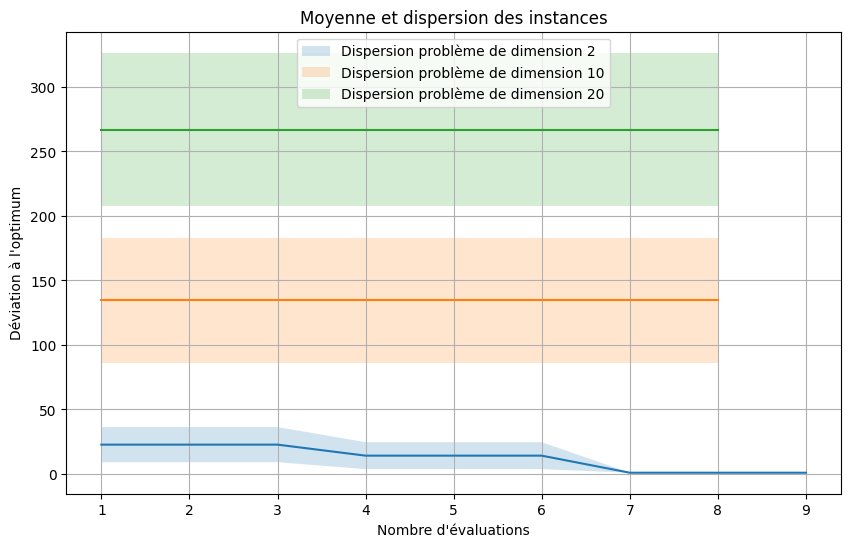

In [ ]:
plt.figure(figsize=(10, 6))

display_mean_std(min_max, contents1, False, False, "Moyenne et dispersion des instances", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, False, False, "Moyenne et dispersion des instances", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, False, False, "Moyenne et dispersion des instances", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")

plt.show()

# GRAPHE(S) 1

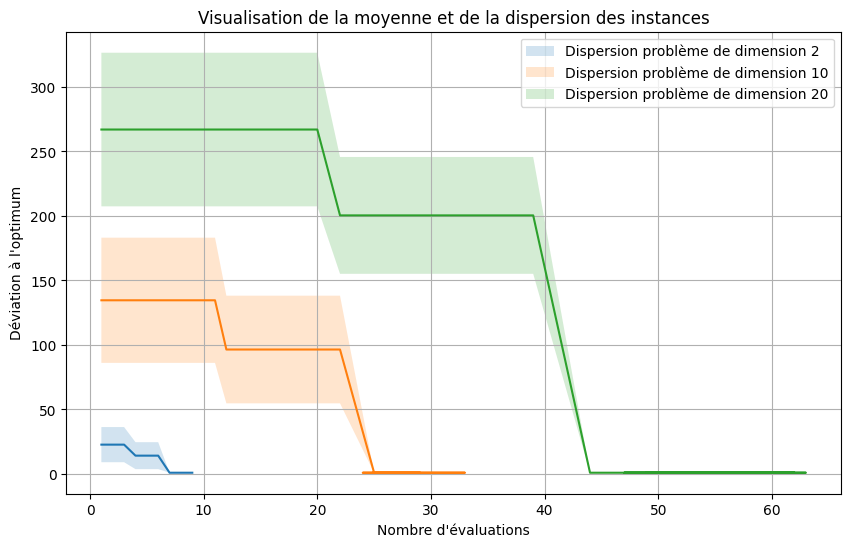

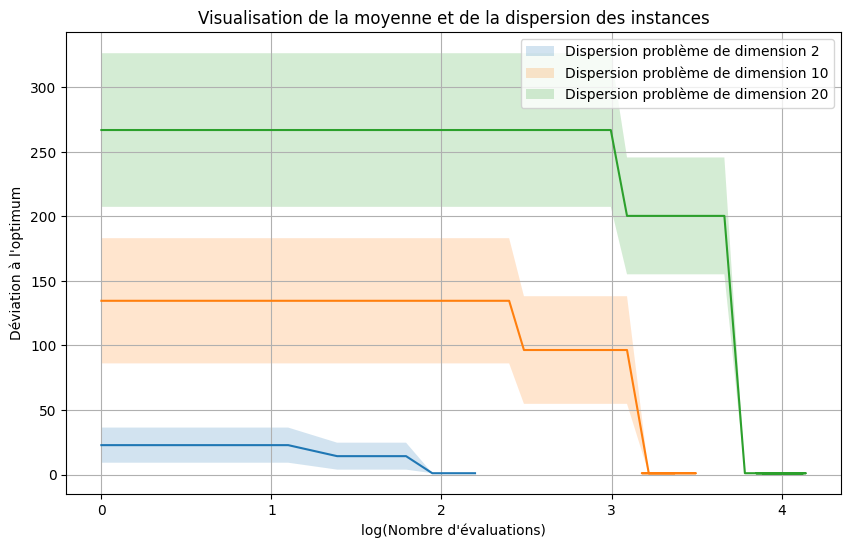

In [ ]:
plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, False, False, "Visualisation de la moyenne et de la dispersion des instances", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, False, False, "Visualisation de la moyenne et de la dispersion des instances", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, False, False, "Visualisation de la moyenne et de la dispersion des instances", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, True, False, "Visualisation de la moyenne et de la dispersion des instances", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, True, False, "Visualisation de la moyenne et de la dispersion des instances", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, True, False, "Visualisation de la moyenne et de la dispersion des instances", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


In [ ]:
min_max1, contents1 = extract_content('sample_data/BFGS/data_f6/bbobexp_f6_DIM2.tdat')
min_max2, contents2 = extract_content('sample_data/BFGS/data_f6/bbobexp_f6_DIM10.tdat')
min_max3, contents3 = extract_content('sample_data/BFGS/data_f6/bbobexp_f6_DIM20.tdat')

# GRAPHE(S) 2

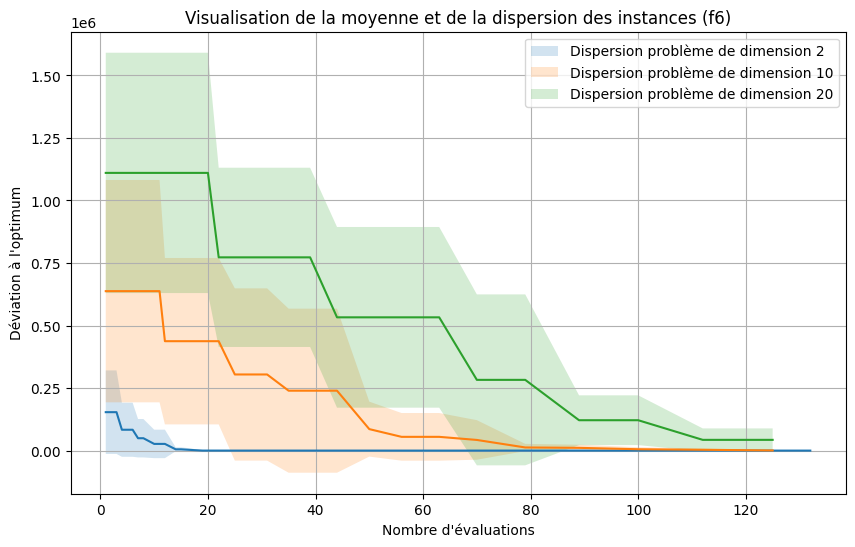

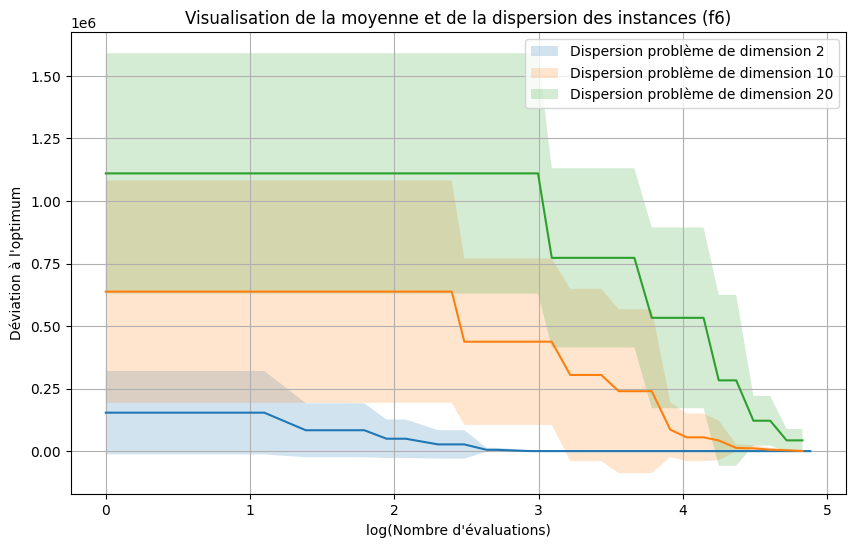

In [ ]:
min_max = min(min_max1, min_max2, min_max3)

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, False, False, "Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, False, False, "Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, False, False, "Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, True, False, "Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, True, False, "Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, True, False, "Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

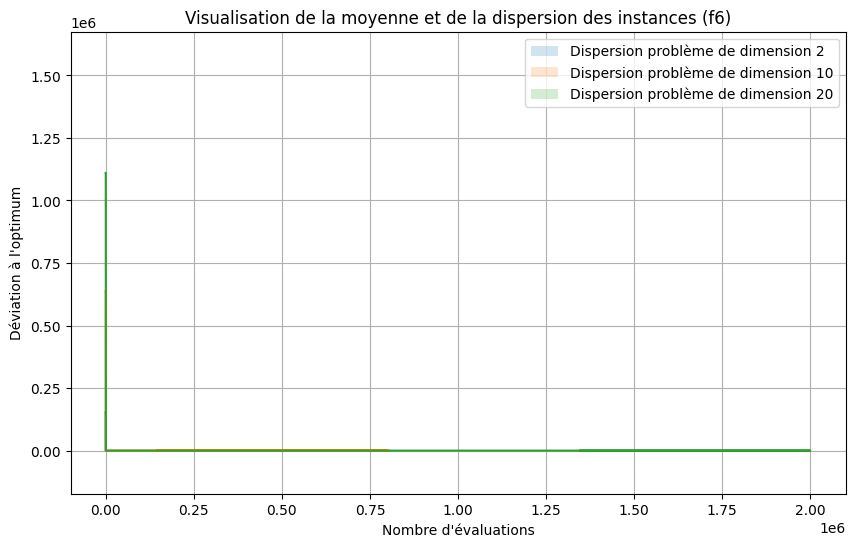

In [ ]:
plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, False, False, "Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, False, False, "Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, False, False, "Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


In [ ]:
min_max1, contents1 = extract_content('sample_data/BFGS/data_f10/bbobexp_f10_DIM2.tdat')
min_max2, contents2 = extract_content('sample_data/BFGS/data_f10/bbobexp_f10_DIM10.tdat')
min_max3, contents3 = extract_content('sample_data/BFGS/data_f10/bbobexp_f10_DIM20.tdat')


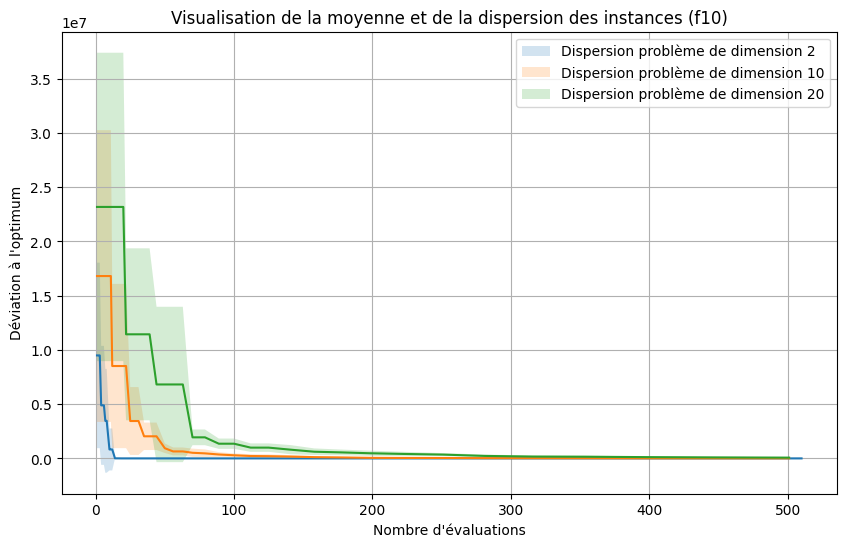

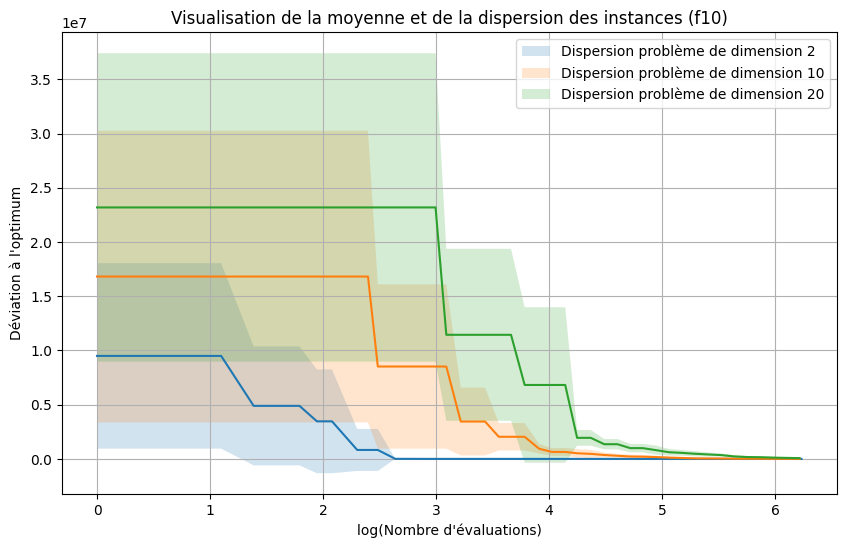

In [ ]:
min_max = min(min_max1, min_max2, min_max3)

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, False, False, "Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, False, False, "Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, False, False, "Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, True, False, "Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, True, False, "Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, True, False, "Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


# GRAPHE(S) 3

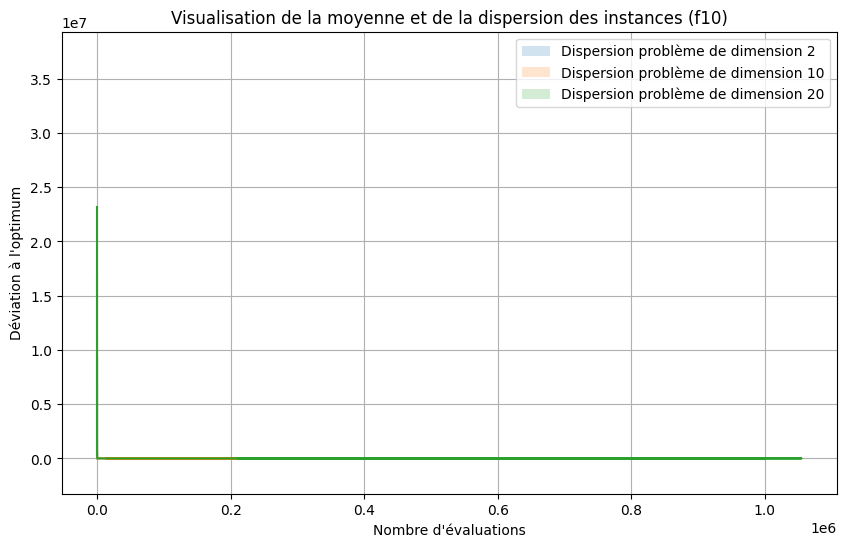

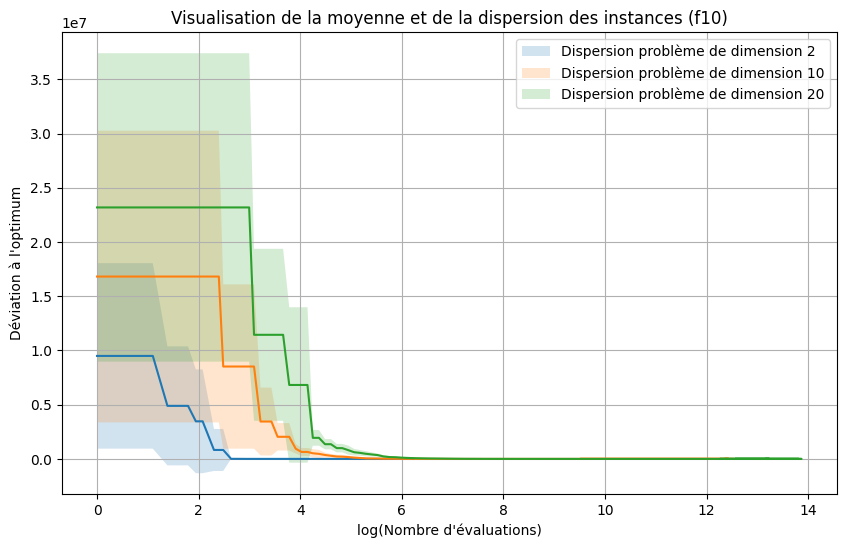

In [ ]:
plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, False, False, "Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, False, False, "Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, False, False, "Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, True, False, "Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, True, False, "Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, True, False, "Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


In [ ]:
min_max1, contents1 = extract_content('sample_data/BFGS/data_f15/bbobexp_f15_DIM2.tdat')
min_max2, contents2 = extract_content('sample_data/BFGS/data_f15/bbobexp_f15_DIM10.tdat')
min_max3, contents3 = extract_content('sample_data/BFGS/data_f15/bbobexp_f15_DIM20.tdat')


# GRAPHE(S) 4

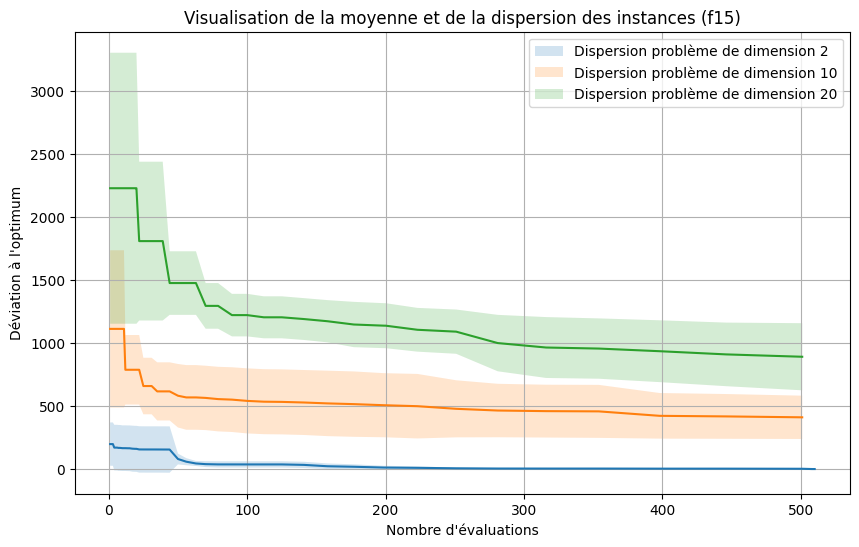

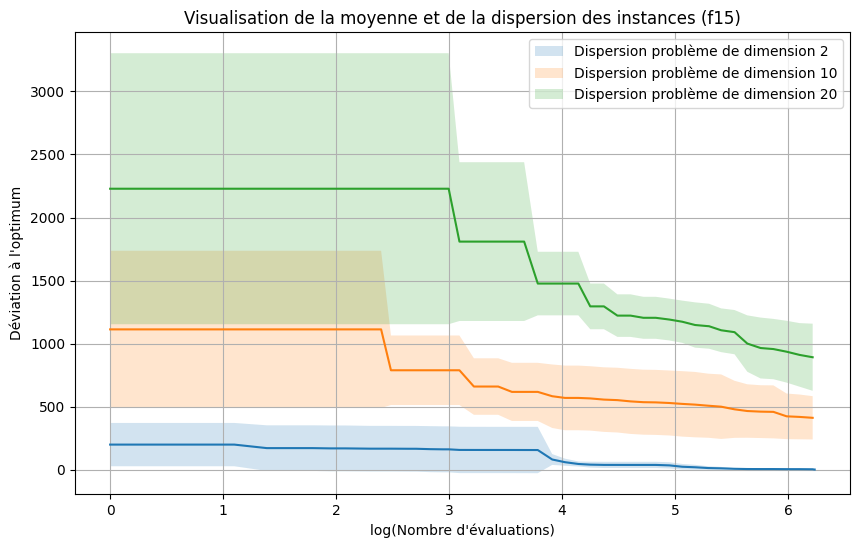

In [ ]:
plt.figure(figsize=(10, 6))
min_max = min(min_max1, min_max2, min_max3)
display_mean_std(min_max, contents1, False, False, "Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, False, False, "Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, False, False, "Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
min_max = min(min_max1, min_max2, min_max3)
display_mean_std(min_max, contents1, True, False, "Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, True, False, "Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, True, False, "Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


In [ ]:
min_max1, contents1 = extract_content('sample_data/BFGS/data_f20/bbobexp_f20_DIM2.tdat')
min_max2, contents2 = extract_content('sample_data/BFGS/data_f20/bbobexp_f20_DIM10.tdat')
min_max3, contents3 = extract_content('sample_data/BFGS/data_f20/bbobexp_f20_DIM20.tdat')


# GRAPHE(S) 5

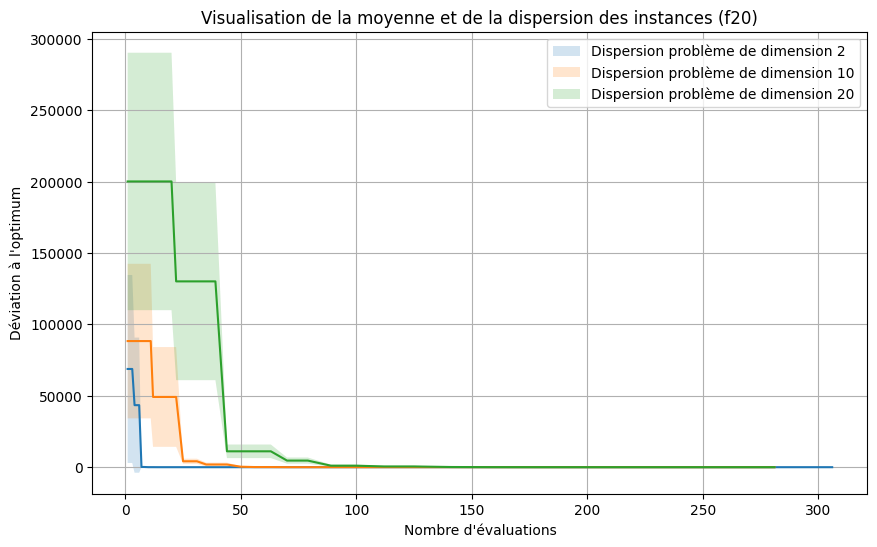

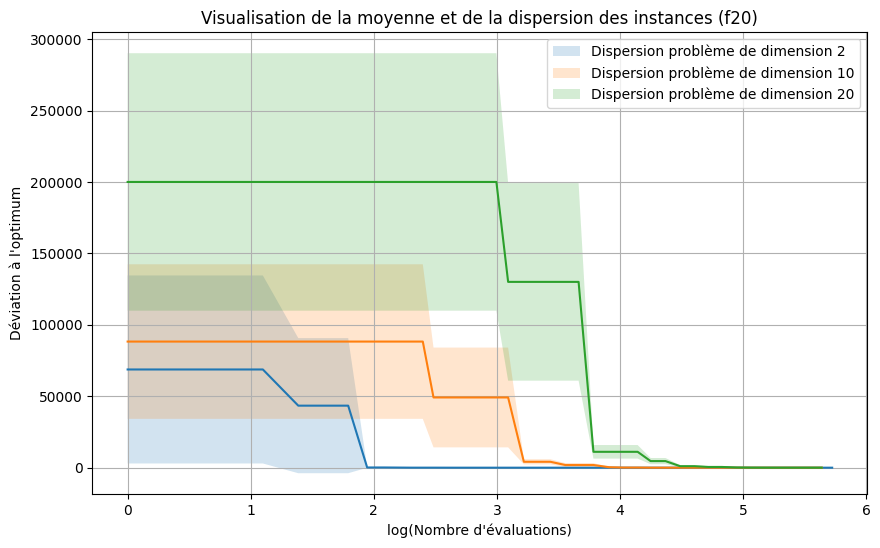

In [ ]:
min_max = min(min_max1, min_max2, min_max3)

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, False, False, "Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, False, False, "Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, False, False, "Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, True, False, "Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, True, False, "Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, True, False, "Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


In [ ]:
# Algorythm RANDOMSEARCH 5

In [ ]:
min_max1, contents1 = extract_content('sample_data/RANDOMSEARCH_5/data_f1/bbobexp_f1_DIM2_i1.tdat')
min_max2, contents2 = extract_content('sample_data/RANDOMSEARCH_5/data_f1/bbobexp_f1_DIM10_i1.tdat')
min_max3, contents3 = extract_content('sample_data/RANDOMSEARCH_5/data_f1/bbobexp_f1_DIM20_i1.tdat')


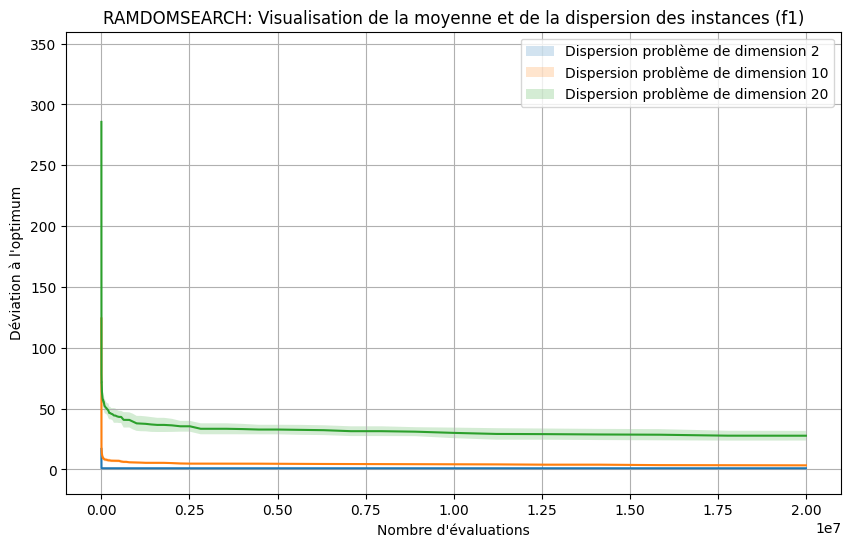

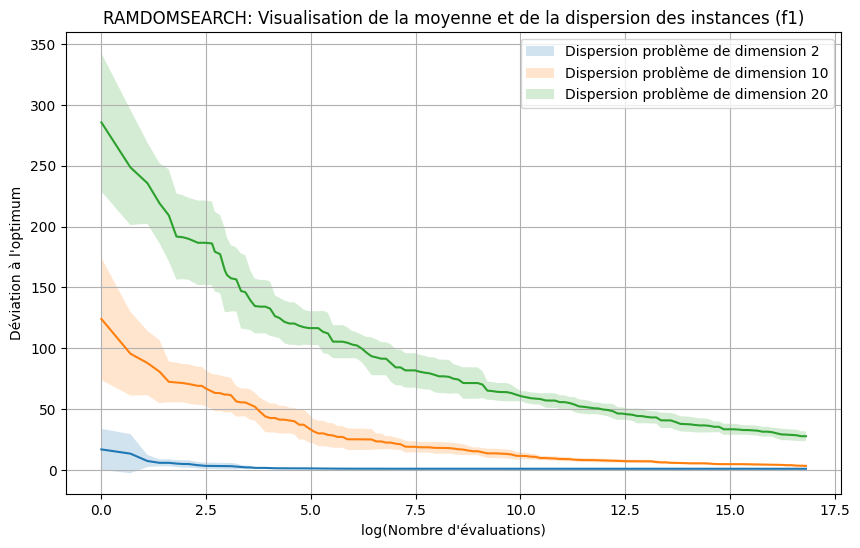

In [ ]:
min_max = min(min_max1, min_max2, min_max3)

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


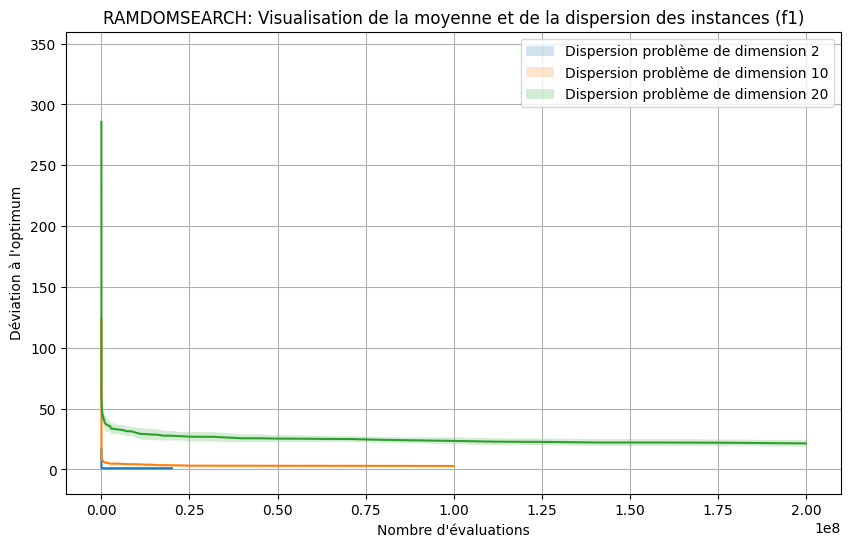

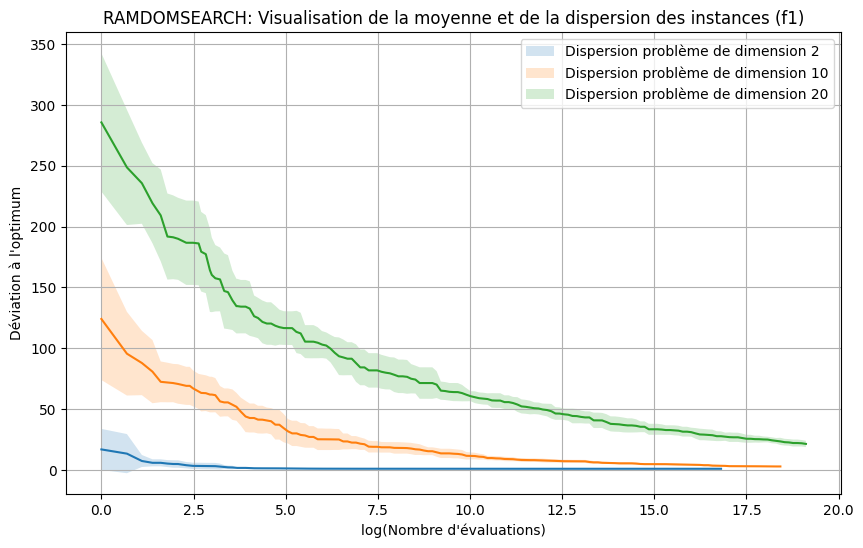

In [ ]:
plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


In [ ]:
min_max1, contents1 = extract_content('sample_data/RANDOMSEARCH_5/data_f6/bbobexp_f6_DIM2_i1.tdat')
min_max2, contents2 = extract_content('sample_data/RANDOMSEARCH_5/data_f6/bbobexp_f6_DIM10_i1.tdat')
min_max3, contents3 = extract_content('sample_data/RANDOMSEARCH_5/data_f6/bbobexp_f6_DIM20_i1.tdat')


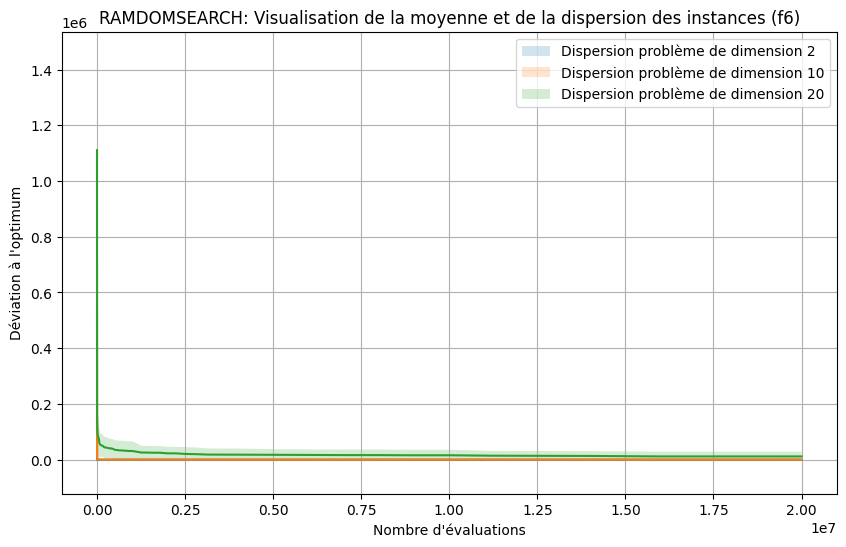

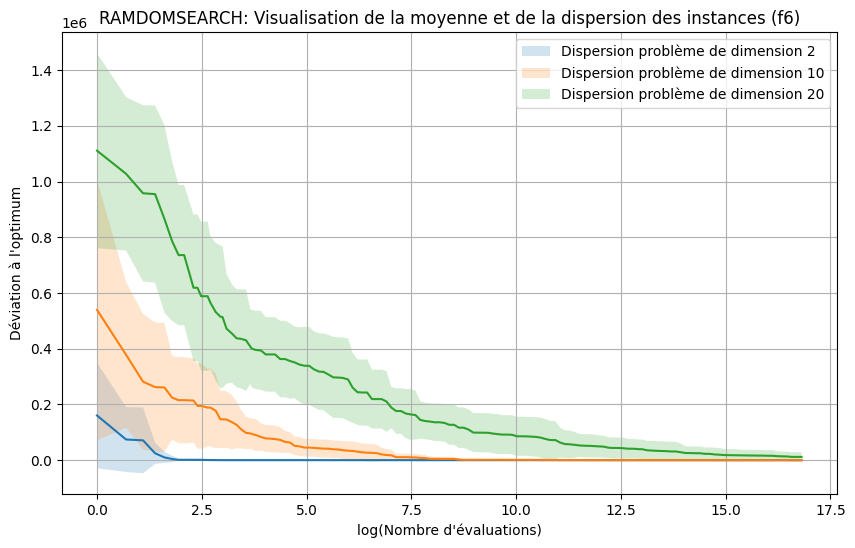

In [ ]:
min_max = min(min_max1, min_max2, min_max3)

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


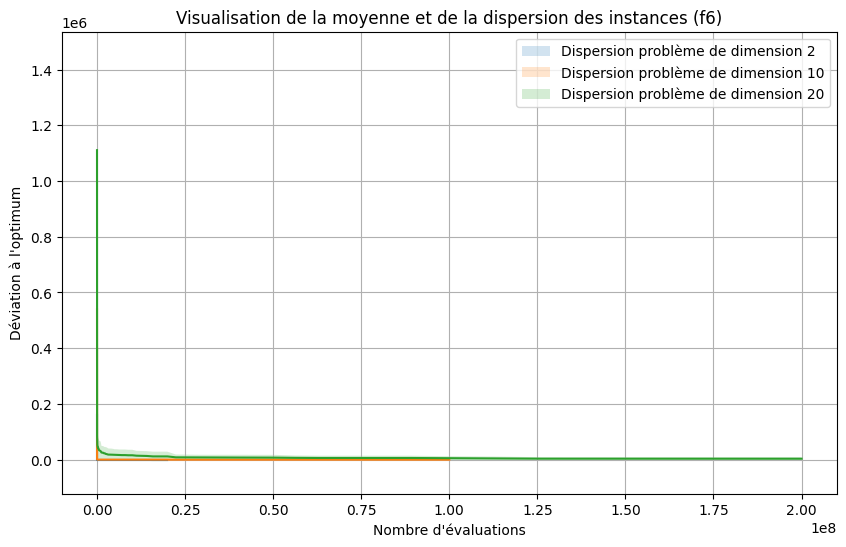

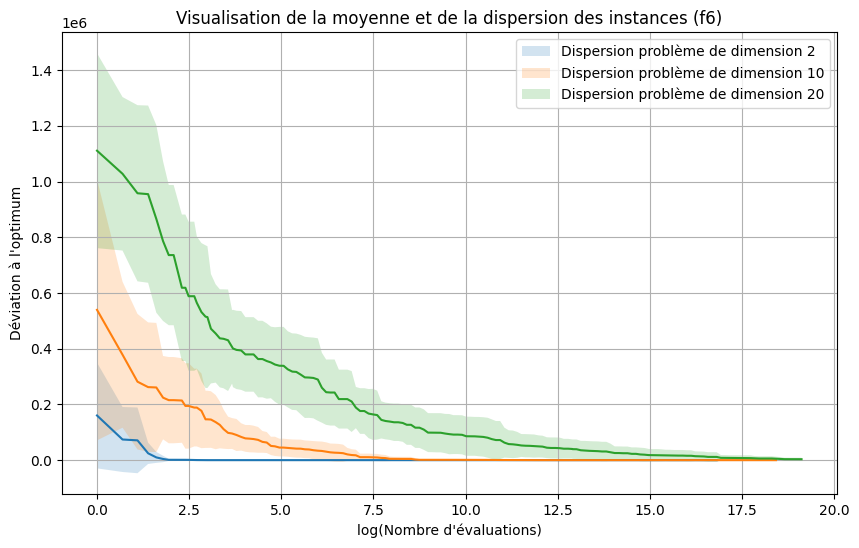

In [ ]:
plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, False, False, "Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, False, False, "Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, False, False, "Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, True, False, "Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, True, False, "Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, True, False, "Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


In [ ]:
min_max1, contents1 = extract_content('sample_data/RANDOMSEARCH_5/data_f10/bbobexp_f10_DIM2_i1.tdat')
min_max2, contents2 = extract_content('sample_data/RANDOMSEARCH_5/data_f10/bbobexp_f10_DIM10_i1.tdat')
min_max3, contents3 = extract_content('sample_data/RANDOMSEARCH_5/data_f10/bbobexp_f10_DIM20_i1.tdat')


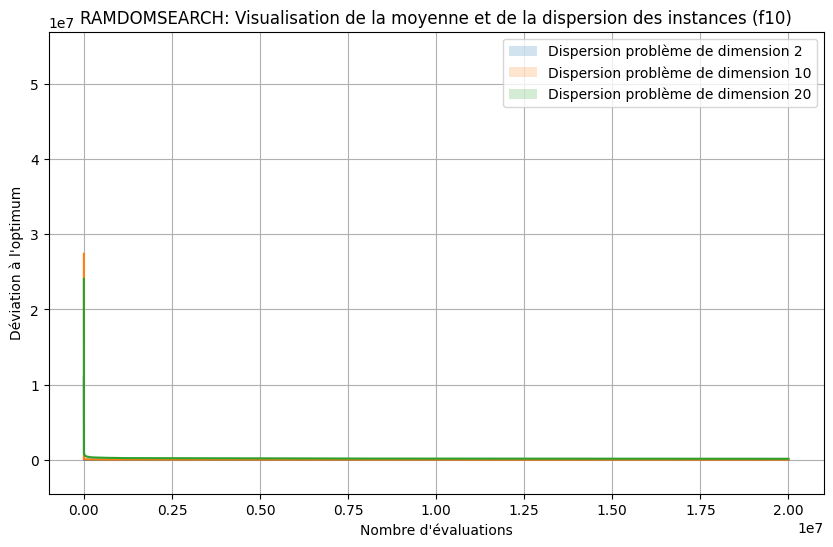

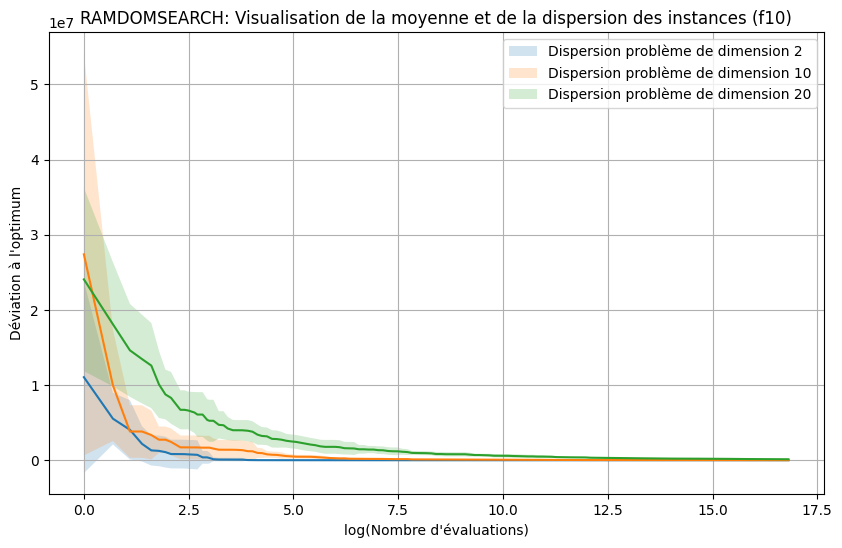

In [ ]:
min_max = min(min_max1, min_max2, min_max3)

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


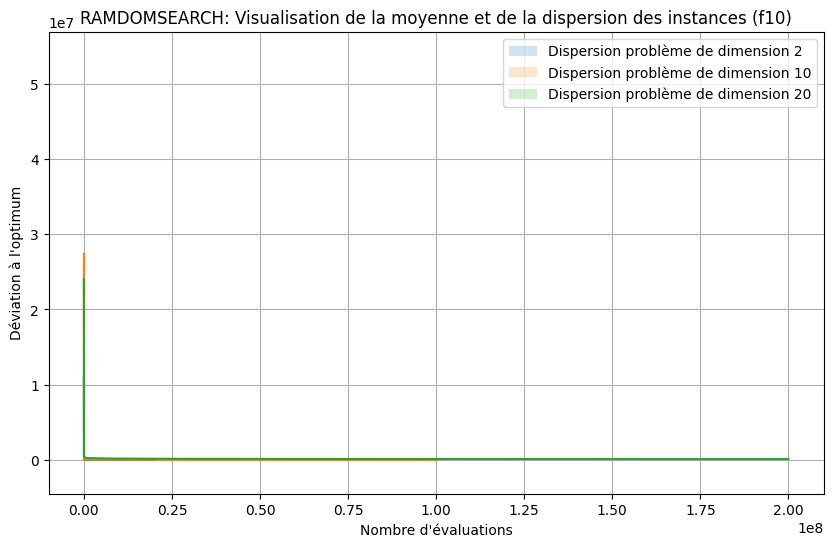

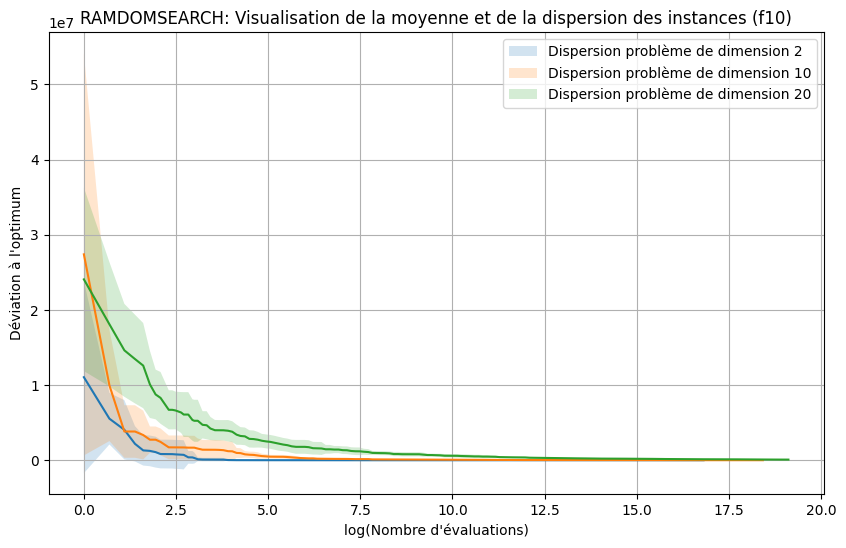

In [ ]:
plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


In [ ]:
min_max1, contents1 = extract_content('sample_data/RANDOMSEARCH_5/data_f15/bbobexp_f15_DIM2_i1.tdat')
min_max2, contents2 = extract_content('sample_data/RANDOMSEARCH_5/data_f15/bbobexp_f15_DIM10_i1.tdat')
min_max3, contents3 = extract_content('sample_data/RANDOMSEARCH_5/data_f15/bbobexp_f15_DIM20_i1.tdat')


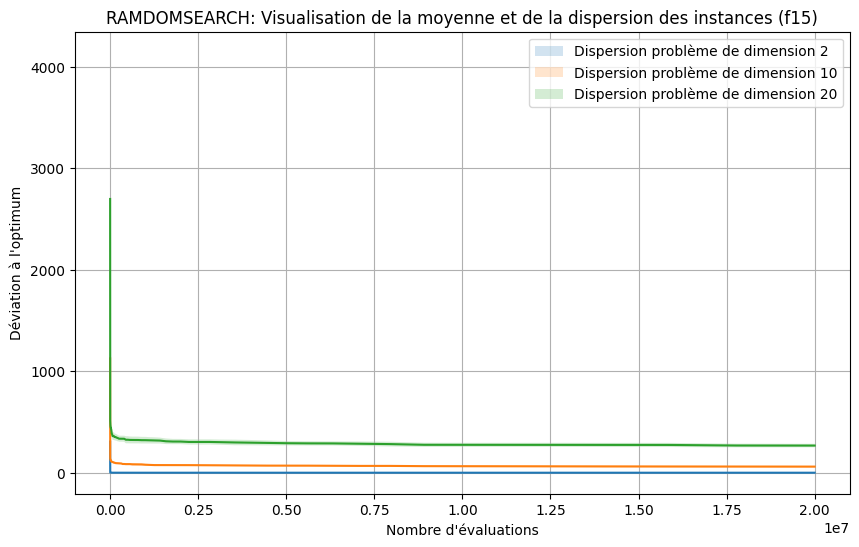

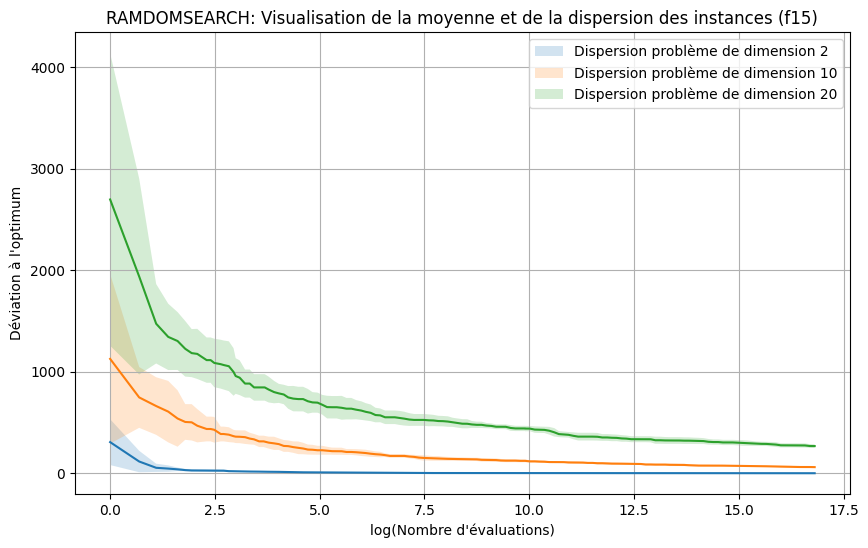

In [ ]:
min_max = min(min_max1, min_max2, min_max3)

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


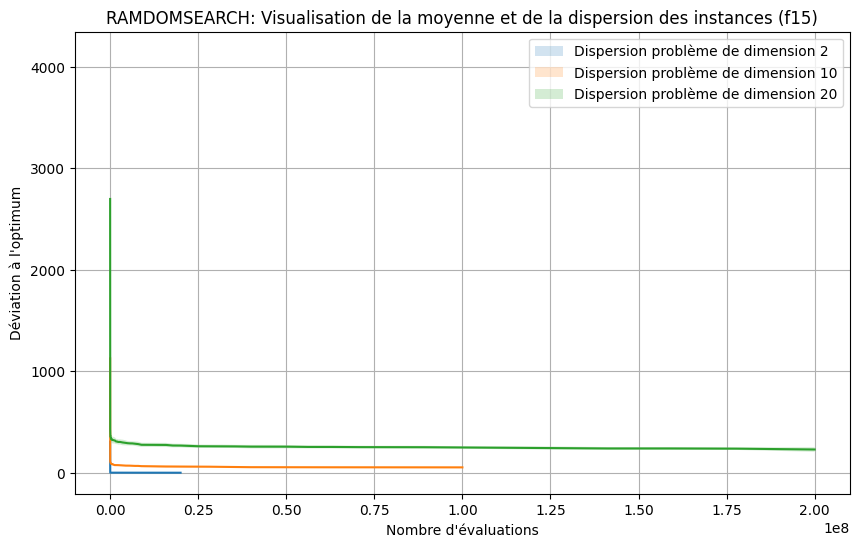

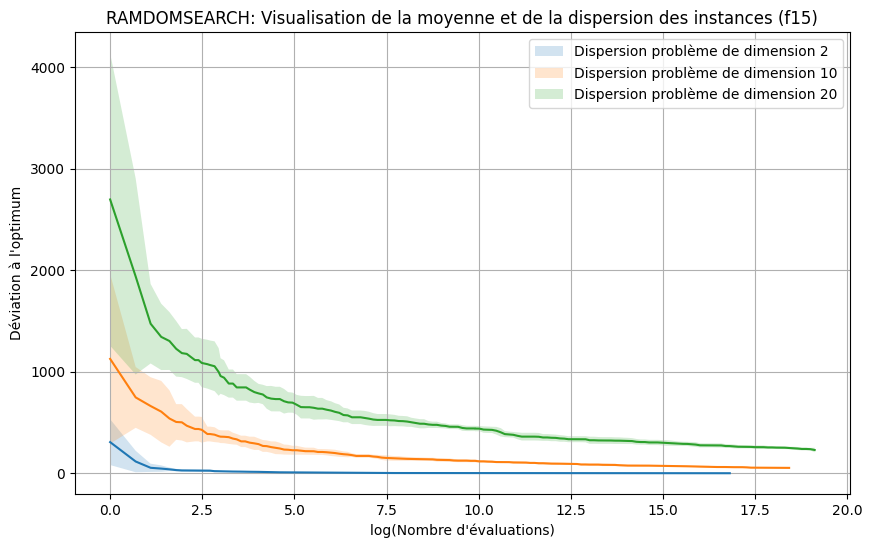

In [ ]:
plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


In [ ]:
min_max1, contents1 = extract_content('sample_data/RANDOMSEARCH_5/data_f20/bbobexp_f20_DIM2_i1.tdat')
min_max2, contents2 = extract_content('sample_data/RANDOMSEARCH_5/data_f20/bbobexp_f20_DIM10_i1.tdat')
min_max3, contents3 = extract_content('sample_data/RANDOMSEARCH_5/data_f20/bbobexp_f20_DIM20_i1.tdat')


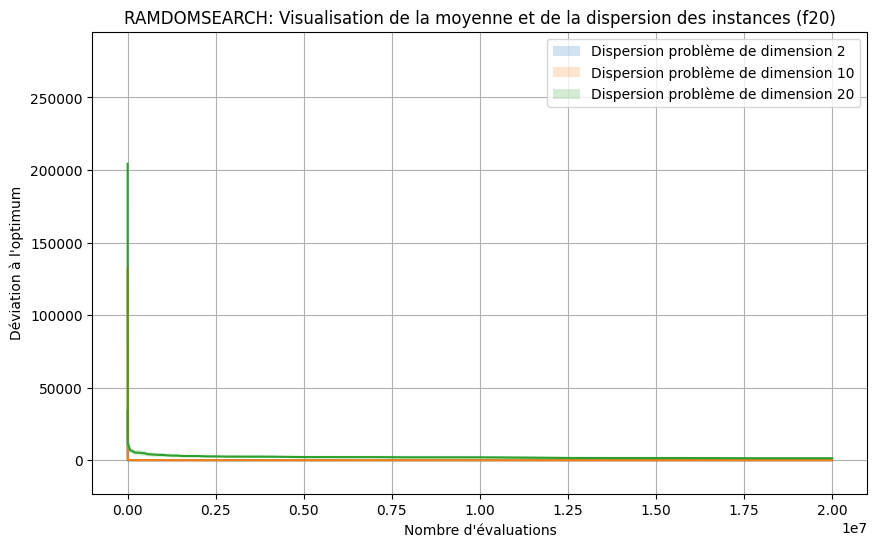

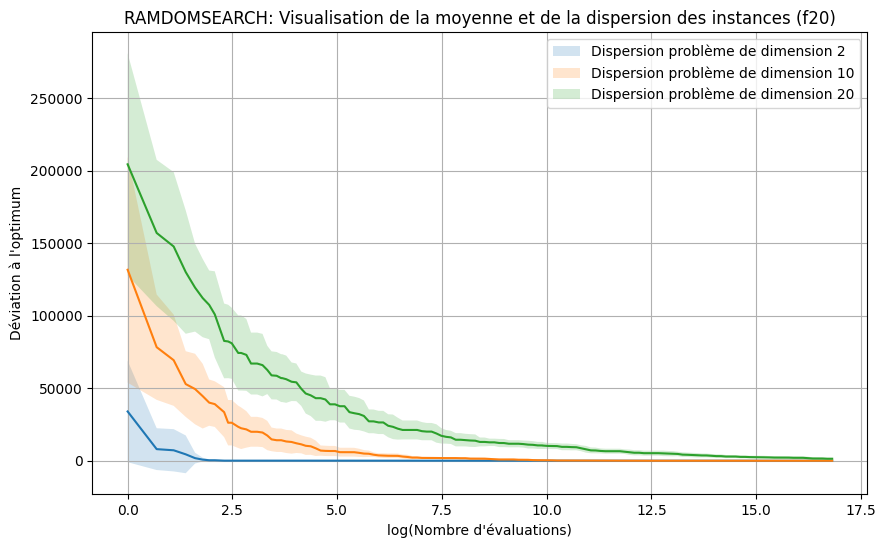

In [ ]:
min_max = min(min_max1, min_max2, min_max3)

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


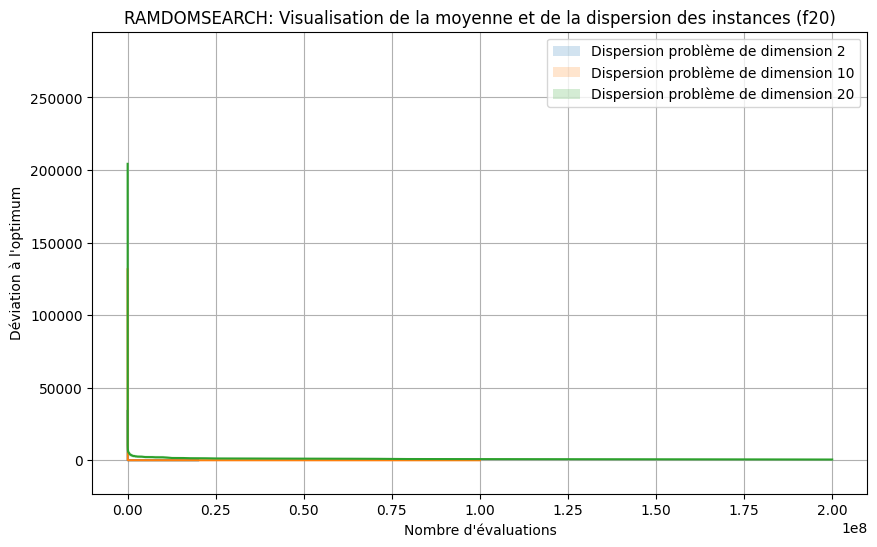

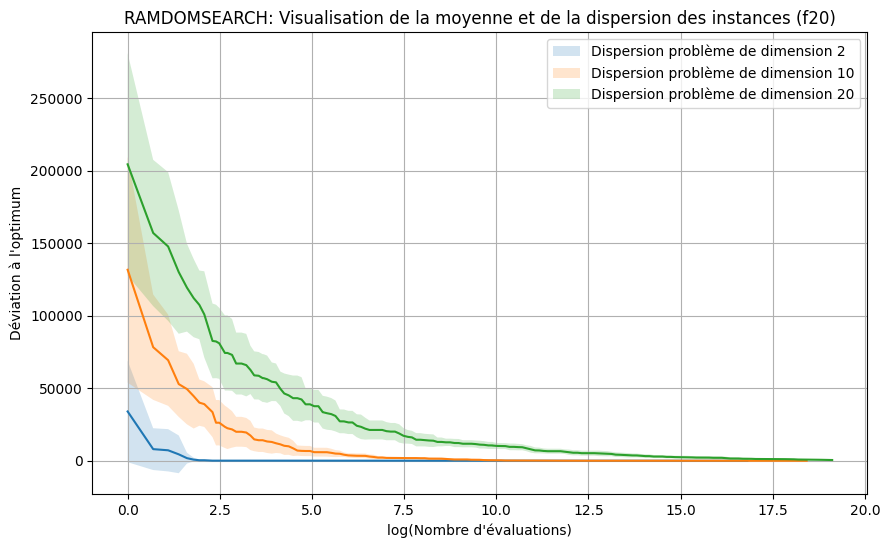

In [ ]:
plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, False, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, True, False, "RAMDOMSEARCH: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


In [ ]:
# Algorythm TEXP

In [ ]:
min_max1, contents1 = extract_content('sample_data/AMALGAM/data_f1/bbobexp_f1_DIM2.tdat')
min_max2, contents2 = extract_content('sample_data/AMALGAM/data_f1/bbobexp_f1_DIM10.tdat')
min_max3, contents3 = extract_content('sample_data/AMALGAM/data_f1/bbobexp_f1_DIM20.tdat')


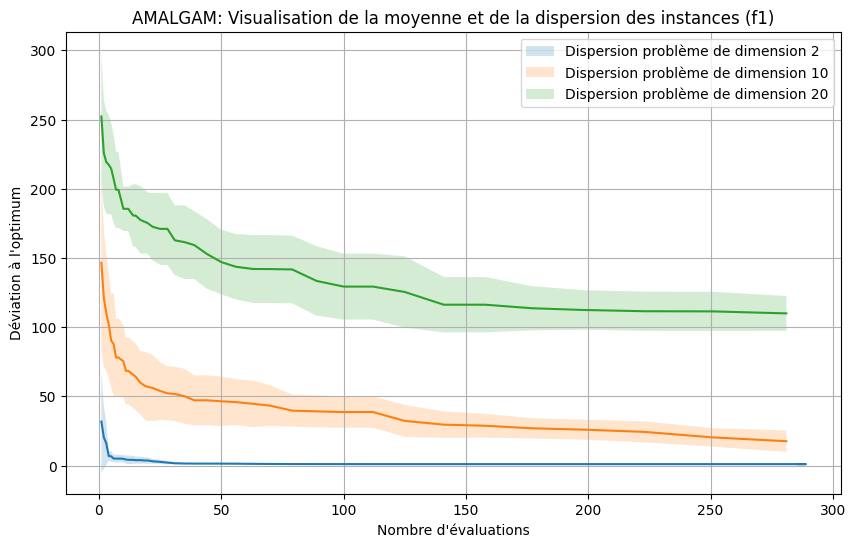

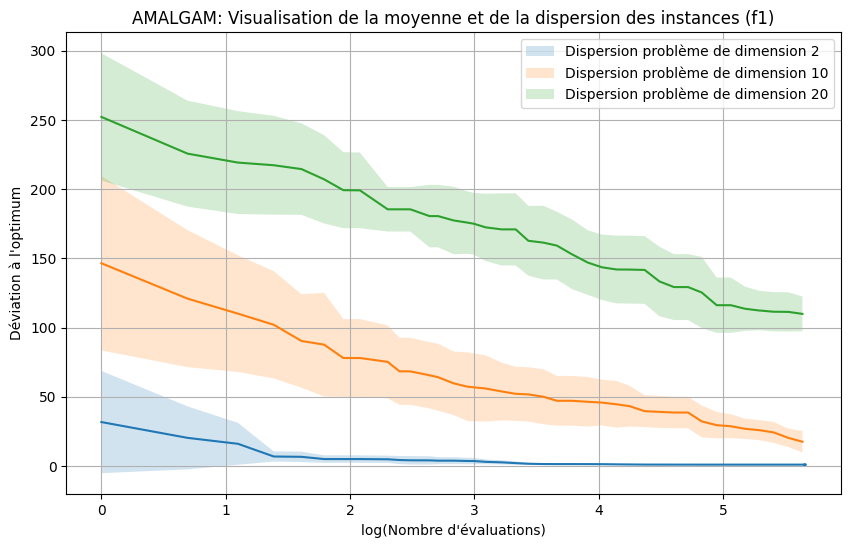

In [ ]:
min_max = min(min_max1, min_max2, min_max3)

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


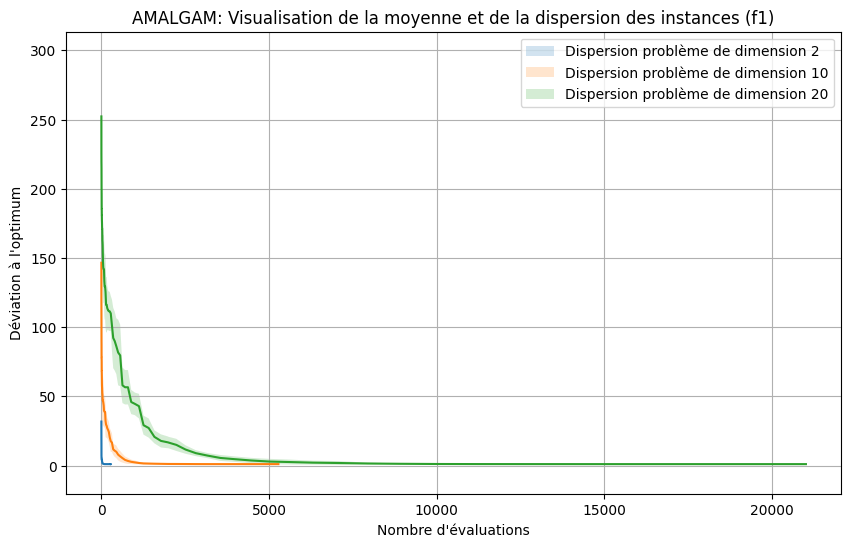

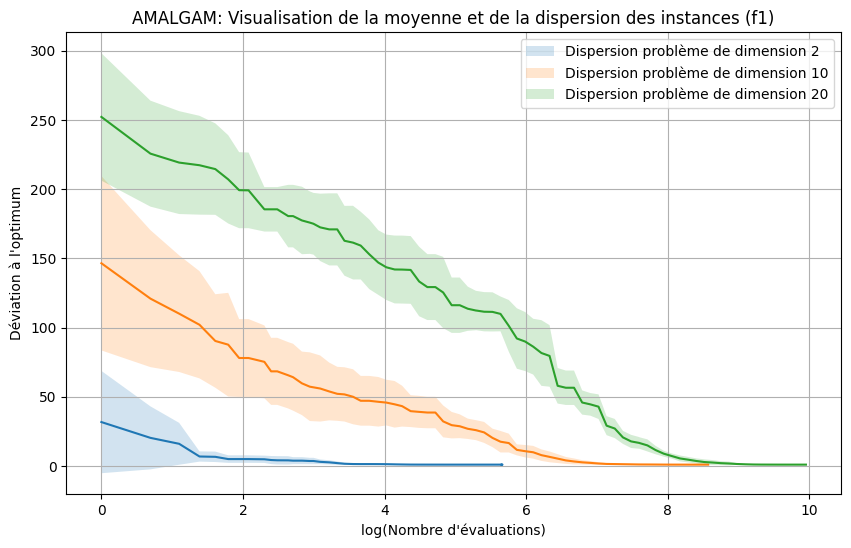

In [ ]:
plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f1)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


In [ ]:
min_max1, contents1 = extract_content('sample_data/AMALGAM/data_f6/bbobexp_f6_DIM2.tdat')
min_max2, contents2 = extract_content('sample_data/AMALGAM/data_f6/bbobexp_f6_DIM10.tdat')
min_max3, contents3 = extract_content('sample_data/AMALGAM/data_f6/bbobexp_f6_DIM20.tdat')


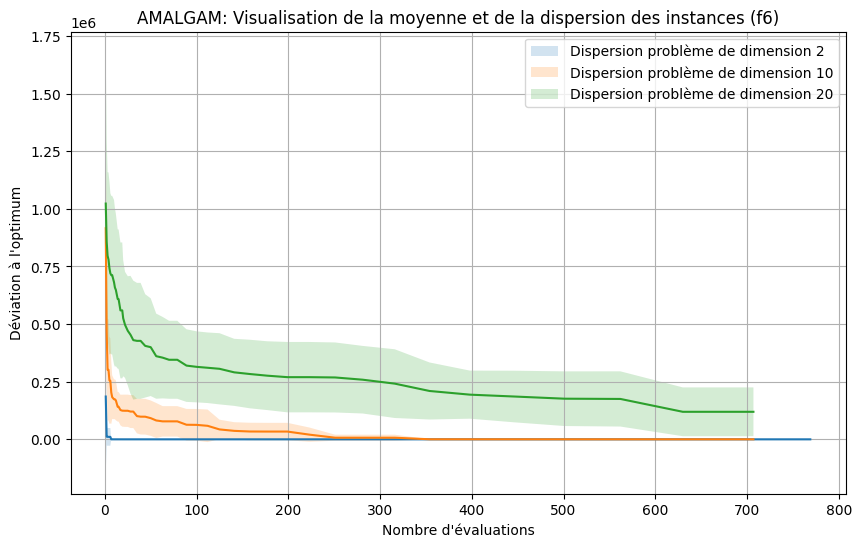

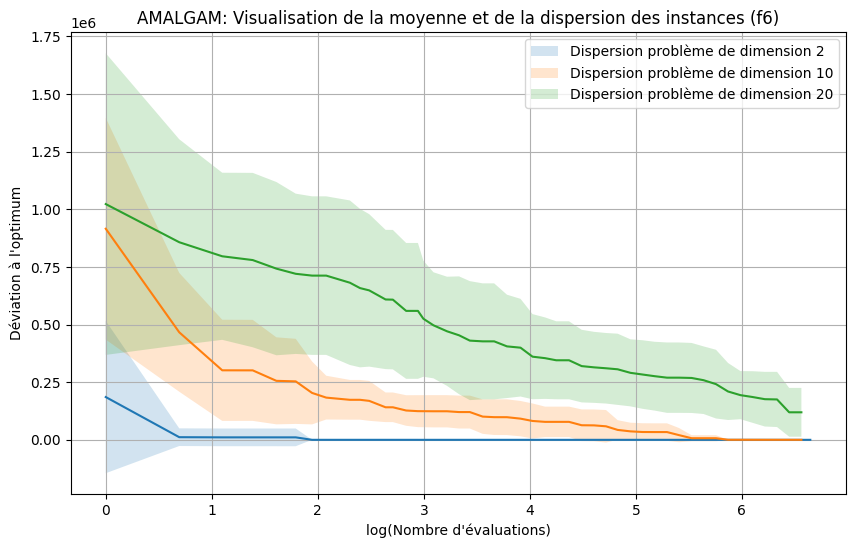

In [ ]:
min_max = min(min_max1, min_max2, min_max3)

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


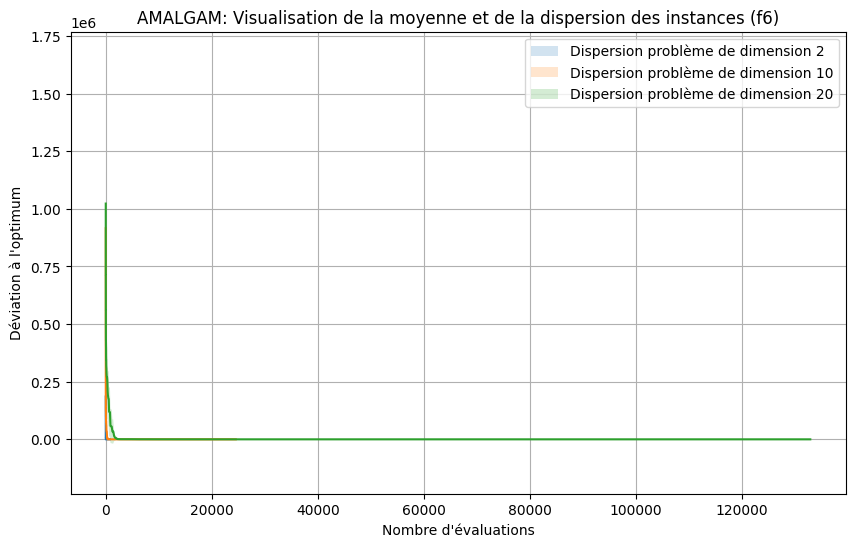

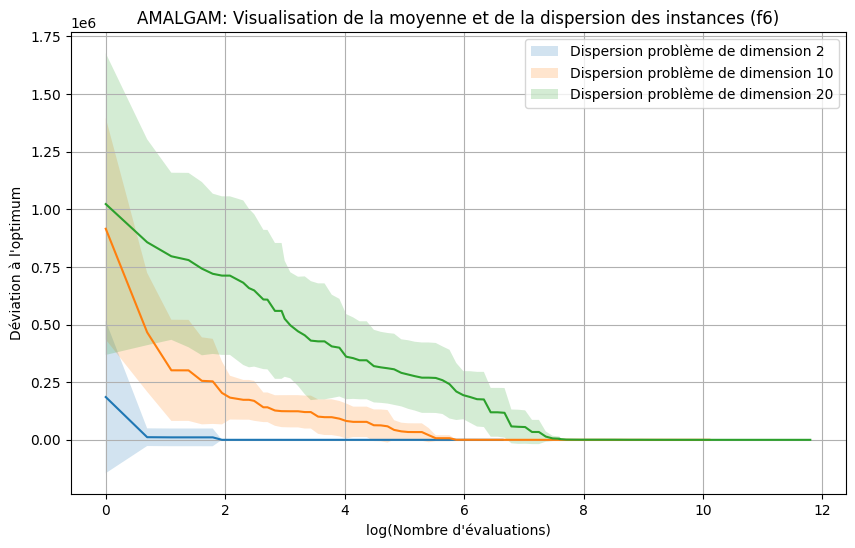

In [ ]:
plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f6)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


In [ ]:
min_max1, contents1 = extract_content('sample_data/AMALGAM/data_f10/bbobexp_f10_DIM2.tdat')
min_max2, contents2 = extract_content('sample_data/AMALGAM/data_f10/bbobexp_f10_DIM10.tdat')
min_max3, contents3 = extract_content('sample_data/AMALGAM/data_f10/bbobexp_f10_DIM20.tdat')


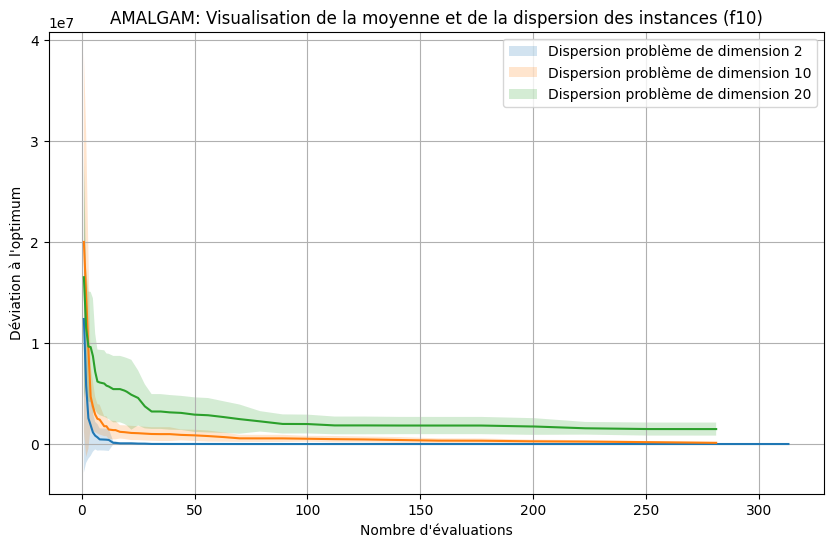

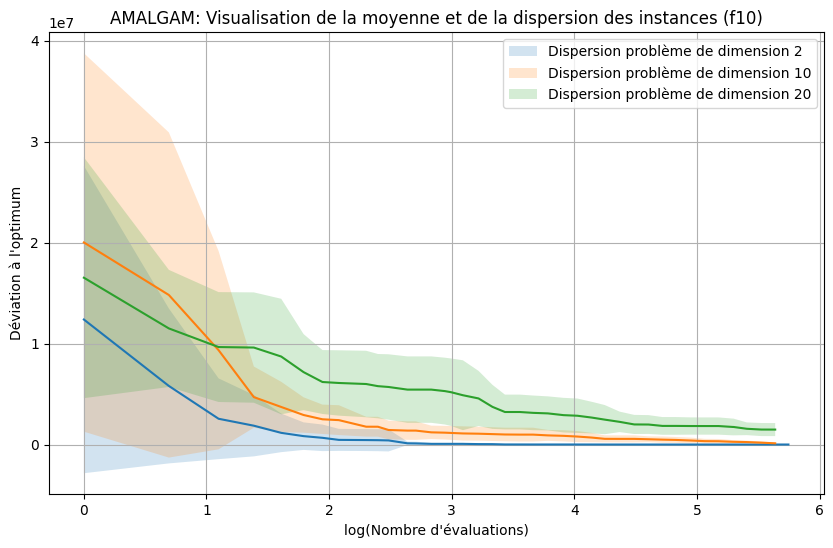

In [ ]:
min_max = min(min_max1, min_max2, min_max3)

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


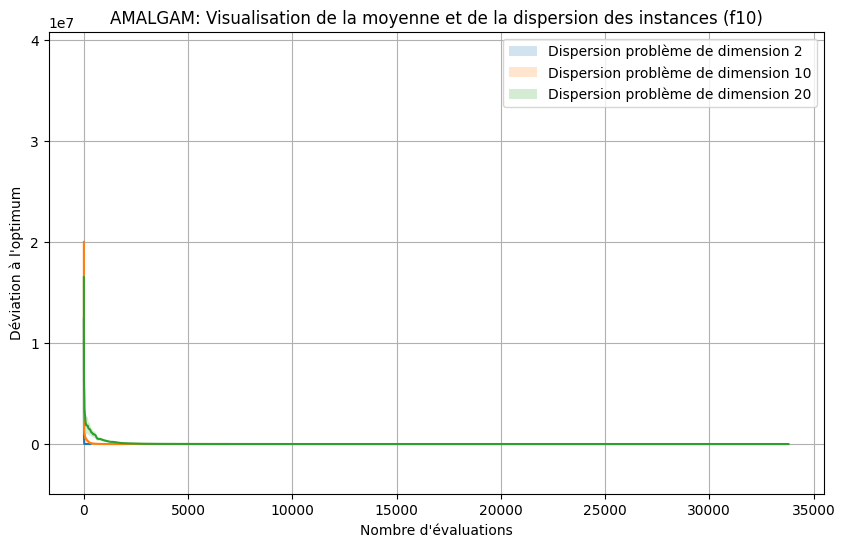

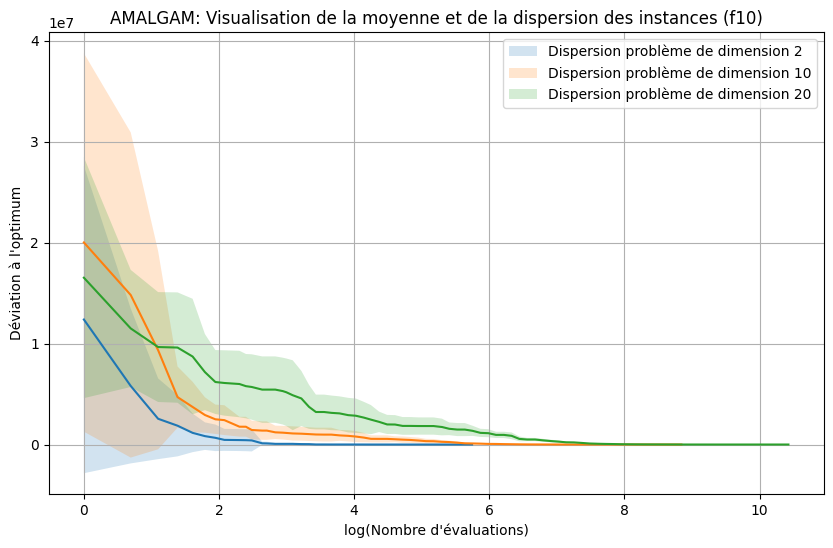

In [ ]:
plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f10)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


In [ ]:
min_max1, contents1 = extract_content('sample_data/AMALGAM/data_f15/bbobexp_f15_DIM2.tdat')
min_max2, contents2 = extract_content('sample_data/AMALGAM/data_f15/bbobexp_f15_DIM10.tdat')
min_max3, contents3 = extract_content('sample_data/AMALGAM/data_f15/bbobexp_f15_DIM20.tdat')


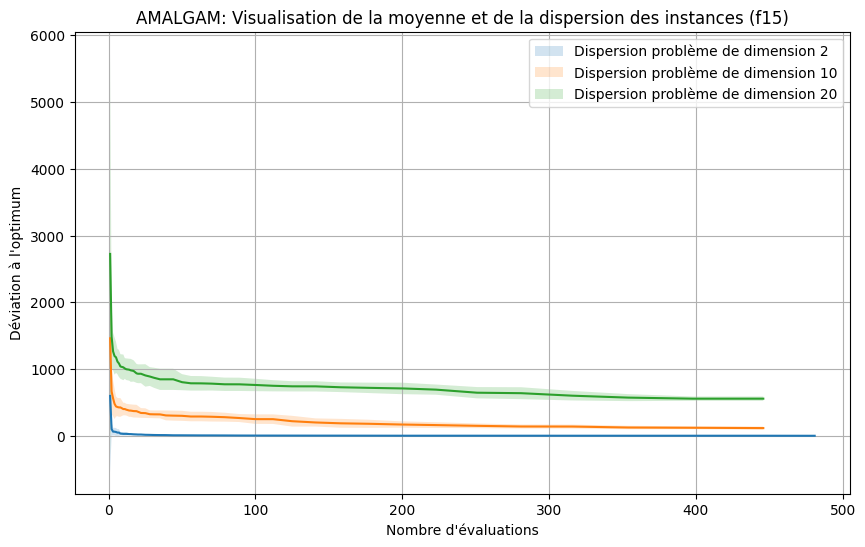

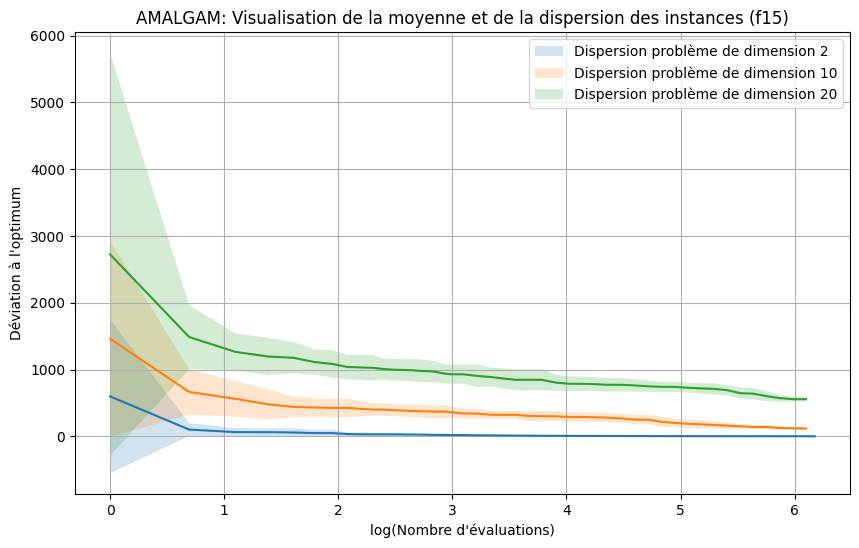

In [ ]:
min_max = min(min_max1, min_max2, min_max3)

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


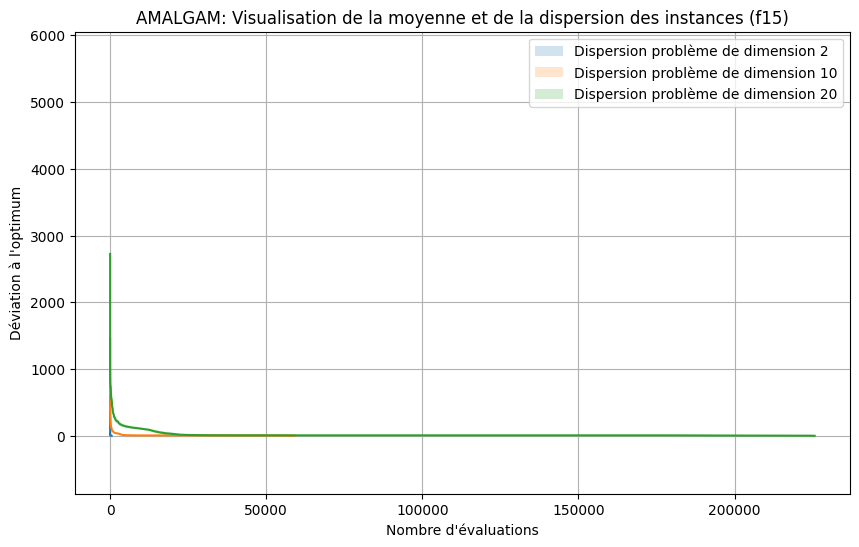

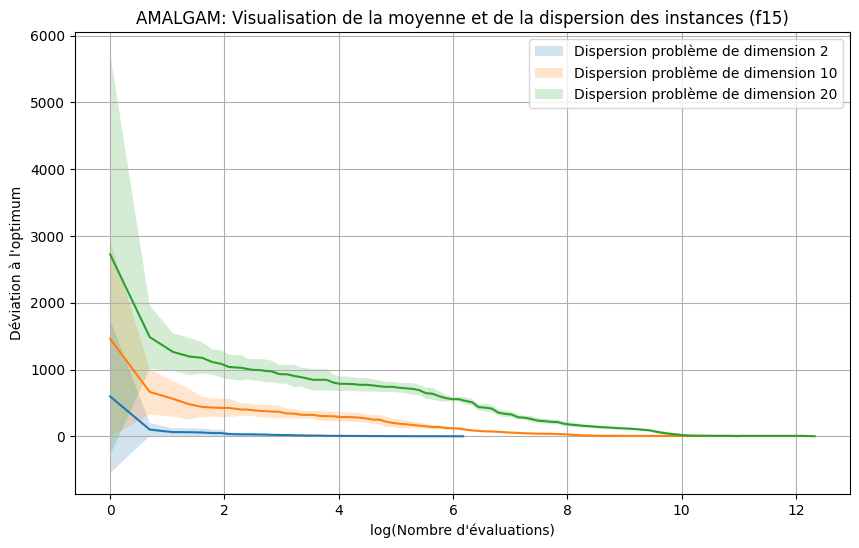

In [ ]:
plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f15)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


In [ ]:
min_max1, contents1 = extract_content('sample_data/AMALGAM/data_f20/bbobexp_f20_DIM2.tdat')
min_max2, contents2 = extract_content('sample_data/AMALGAM/data_f20/bbobexp_f20_DIM10.tdat')
min_max3, contents3 = extract_content('sample_data/AMALGAM/data_f20/bbobexp_f20_DIM20.tdat')


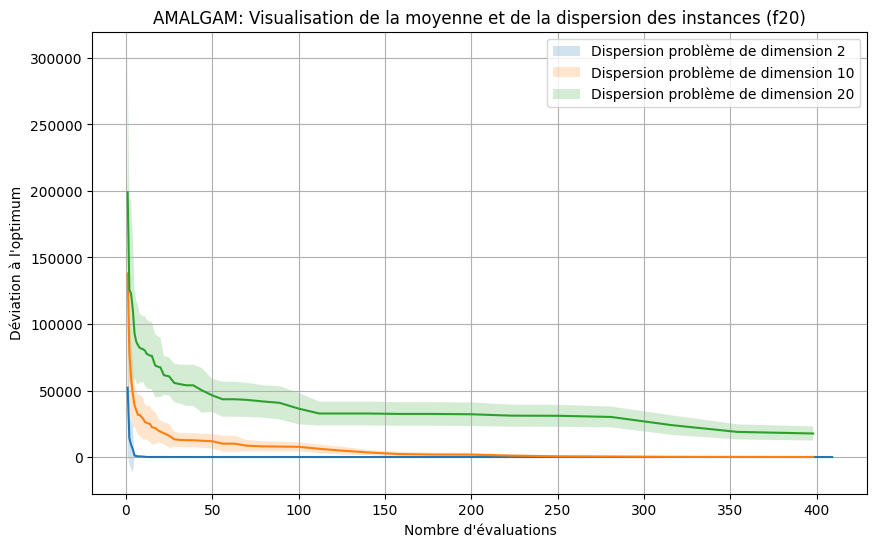

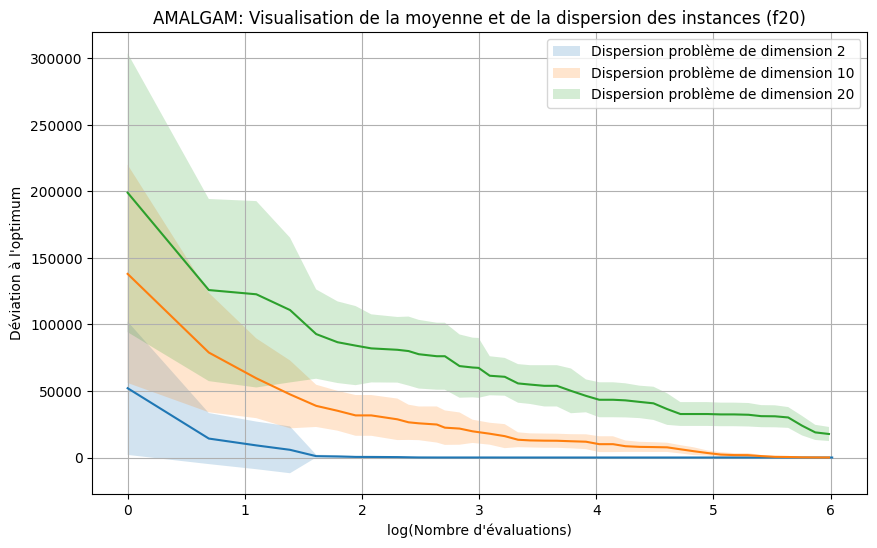

In [ ]:
min_max = min(min_max1, min_max2, min_max3)

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max, contents1, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max, contents2, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max, contents3, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


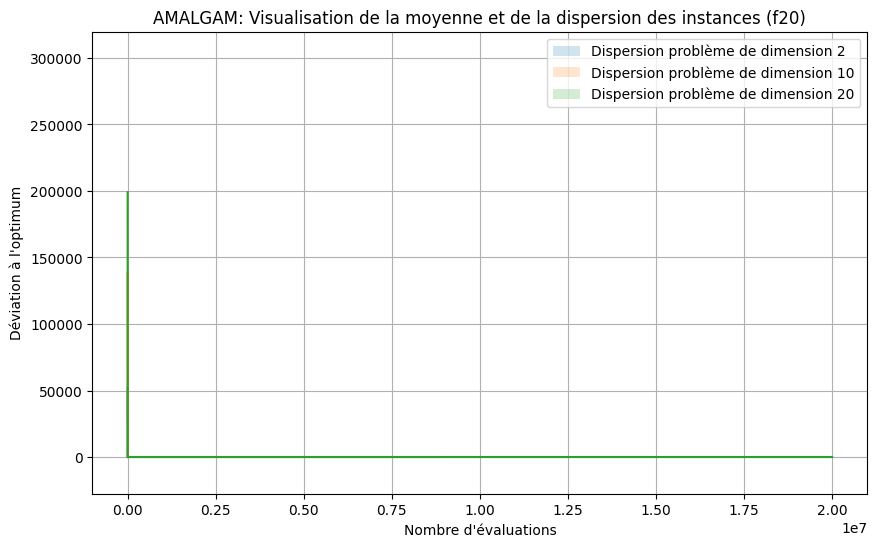

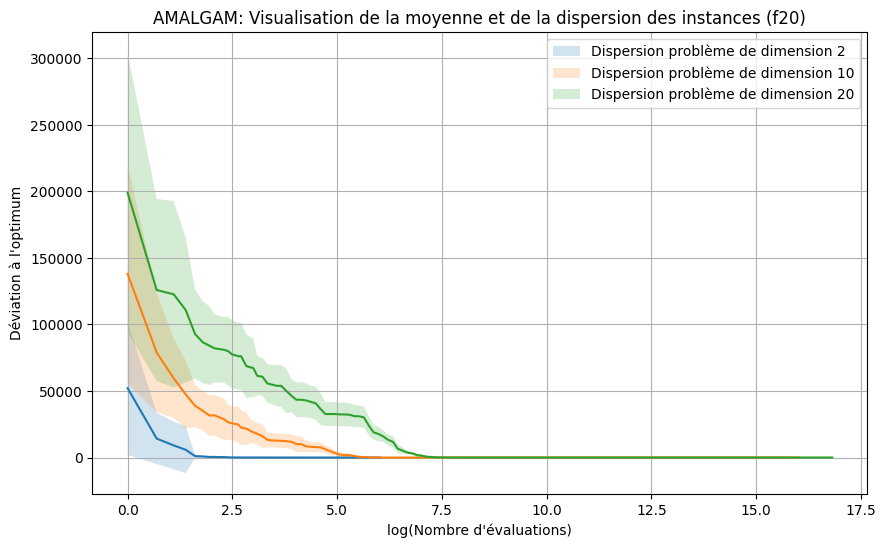

In [ ]:
plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, False, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()

plt.figure(figsize=(10, 6))
display_mean_std(min_max1, contents1, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 2")
display_mean_std(min_max2, contents2, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 10")
display_mean_std(min_max3, contents3, True, False, "AMALGAM: Visualisation de la moyenne et de la dispersion des instances (f20)", "Nombre d'évaluations", "Déviation à l'optimum", "Dispersion problème de dimension 20")
plt.show()


<Figure size 1000x600 with 0 Axes>

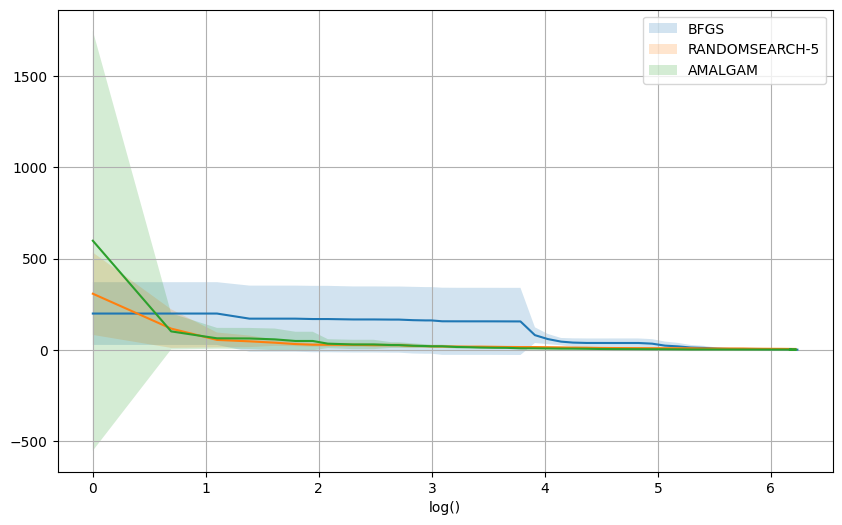

In [ ]:
min_max1, contents1 = extract_content('sample_data/BFGS/data_f15/bbobexp_f15_DIM2.tdat')
min_max2, contents2 = extract_content('sample_data/RANDOMSEARCH_5/data_f15/bbobexp_f15_DIM2_i1.tdat')
min_max3, contents3 = extract_content('sample_data/AMALGAM/data_f15/bbobexp_f15_DIM2.tdat')

plt.figure(figsize=(10, 6))

min_max = min(min_max1, min_max2)
plt.figure(figsize=(10, 6))

display_mean_std(min_max, contents1,
                 True, False,
                 "Comparaison des algorithmes – f15 DIM2",
                 "Nombre d'évaluations",
                 "Déviation à l'optimum",
                 "BFGS")

display_mean_std(min_max, contents2,
                 True, False,
                 "", "", "", "RANDOMSEARCH‑5")   # on laisse le titre vide pour ne pas le répéter

display_mean_std(min_max, contents3,
                 True, False,
                 "", "", "", "AMALGAM")

plt.legend()
plt.show()

plt.show()